In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

c:\Users\abclay\Desktop\Car-Appraisal-Master\venv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("CarvanaClean.csv")

In [3]:
df.head()

,Unnamed: 0,model,details,mileage,Bluetooth,Backup Camera,Infotainment,Screen,Navigation,Hands Free Calling,...,4-Cyl,3-Cyl,V6,V8,6-Cyl,city_mpg,highway_mpg,price,year,make
0,0,Altima,2.5 SR,57543,1,1,1,0,0,1,...,1,0,0,0,0,26,37,19990,2016,Nissan
1,1,Civic,LX,51210,0,0,1,0,0,0,...,1,0,0,0,0,25,36,16990,2011,Honda
2,2,Focus,Titanium,19216,1,1,1,0,0,0,...,1,0,0,0,0,26,38,21990,2016,Ford
3,3,Passat,1.8T Wolfsburg Edition,54167,1,0,1,0,0,1,...,1,0,0,0,0,24,34,17590,2014,Volkswagen
4,4,EcoSport,S,11168,1,1,1,0,0,0,...,1,0,0,0,0,23,29,23990,2021,Ford


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# df.drop(['Bluetooth', 'Backup Camera', 'Infotainment', 'Screen', 'Navigation', 'Hands Free Calling', 'Heated Seats', 'Power Seat Controls', 'Rear Air Vents', 'Bed Liner', 'Tow Hitch', 'details'], inplace=True, axis=1)

In [6]:
# df.drop(['Bluetooth', 'Backup Camera', 'Infotainment', 'Screen', 'Navigation', 'Hands Free Calling', 'Heated Seats', 'Power Seat Controls', 'Rear Air Vents', 'Bed Liner', 'Tow Hitch', '4-Cyl', '3-Cyl', 'V6', 'V8', '6-Cyl', 'details'], inplace=True, axis=1)

In [7]:
df.columns

Index(['model', 'details', 'mileage', 'Bluetooth', 'Backup Camera',
       'Infotainment', 'Screen', 'Navigation', 'Hands Free Calling',
       'Heated Seats', 'Power Seat Controls', 'Rear Air Vents', 'Bed Liner',
       'Tow Hitch', '4-Cyl', '3-Cyl', 'V6', 'V8', '6-Cyl', 'city_mpg',
       'highway_mpg', 'price', 'year', 'make'],
      dtype='object')

In [8]:
len(df)

7294

In [9]:
df.head()

,model,details,mileage,Bluetooth,Backup Camera,Infotainment,Screen,Navigation,Hands Free Calling,Heated Seats,...,4-Cyl,3-Cyl,V6,V8,6-Cyl,city_mpg,highway_mpg,price,year,make
0,Altima,2.5 SR,57543,1,1,1,0,0,1,0,...,1,0,0,0,0,26,37,19990,2016,Nissan
1,Civic,LX,51210,0,0,1,0,0,0,0,...,1,0,0,0,0,25,36,16990,2011,Honda
2,Focus,Titanium,19216,1,1,1,0,0,0,1,...,1,0,0,0,0,26,38,21990,2016,Ford
3,Passat,1.8T Wolfsburg Edition,54167,1,0,1,0,0,1,1,...,1,0,0,0,0,24,34,17590,2014,Volkswagen
4,EcoSport,S,11168,1,1,1,0,0,0,0,...,1,0,0,0,0,23,29,23990,2021,Ford


In [10]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [11]:
len(df_dummies.columns)

1312

In [12]:
X = df_dummies.drop('price', axis=1).to_numpy()
y = df_dummies['price'].to_numpy()
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=10)

pca_X = pca.fit_transform(X)
pca_df = pd.DataFrame(data= pca_X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
len(df_dummies.columns)

1312

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = {
    'learning_rate': np.linspace(0, 1, 10),
    'max_depth': np.arange(2, 10, 2),
    'n_estimators': np.arange(0, 300, 25),
}

In [16]:
xgb = XGBRegressor()

In [17]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [18]:
preds = xgb.predict(X_test)

In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, preds))

In [20]:
RMSE

3448.7612690844267

In [21]:
MAE = mean_absolute_error(y_test, preds)

In [22]:
MAE

2052.3952956327107

In [23]:
# cv = GridSearchCV(XGBRegressor(), param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=3, verbose=1)
# cv.fit(X_train, y_train)
# print(cv.best_params_)
# print(cv.best_score_)
# best_score = str(cv.best_score_)

# with open('params_list.txt', 'a') as file:
#     for key,value in cv.best_params_.items():
#         file.write(key + ": " + str(value))
#         file.write("\n")
#     file.write("Best RMSE Score: " + best_score)
#     file.write("\n")
#     file.write("----------------------------------")
#     file.write("\n")
#     file.close()

In [24]:
# with open('params_list.txt', 'r') as file:
#     for line in file.readlines():
#         print(line)

In [25]:
# preds = cv.predict(X_test)
# RMSE = np.sqrt(mean_squared_error(y_test, preds))
# print("RMSE: -- ", RMSE)

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# RMSE_list = []
# for i in range(99, 120):
#     for j in range(1,20):

#         rf = RandomForestRegressor(n_estimators=i, max_depth=j)
#         rf.fit(X_train, y_train)
#         pred = rf.predict(X_test)
#         RMSE = np.sqrt(mean_squared_error(y_test, pred))
#         data = {
#             'RMSE': RMSE,
#             'max_depth': j,
#             'n_estimators': i,
#         }
#         RMSE_list.append(data)
#         print(data)

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
rf_cv = RandomizedSearchCV(RandomForestRegressor(), param_distributions={'max_depth': range(1, 25), 'n_estimators': range(1,250, 5)}, n_jobs=-1, n_iter=1000, verbose=1, scoring='neg_root_mean_squared_error', cv=3)

In [30]:
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


KeyboardInterrupt: 

In [ ]:
np.max(RMSE_list)

In [ ]:
# Here I will begin the Tensorflow workflow from the top

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


In [ ]:
X = df_dummies.drop('price', axis=1).to_numpy()
y = df_dummies['price'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
checkpoint = ModelCheckpoint('./checkpoints', monitor="mean_absolute_error", verbose=1, save_best_only=True, save_weights_only=True, mode="auto")

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(X_train)


In [ ]:
linear_model = Sequential([
    normalizer,
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(1)
])

In [ ]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [ ]:
history = linear_model.fit(X_train, y_train, epochs=500, verbose=1, validation_split=.2, callbacks=[checkpoint])

Epoch 1/500
144/146 [============================>.] - ETA: 0s - loss: 14289.6348 - mean_absolute_error: 14289.6348
Epoch 1: mean_absolute_error improved from inf to 14245.38184, saving model to .\checkpoints
146/146 [==============================] - 1s 3ms/step - loss: 14245.3818 - mean_absolute_error: 14245.3818 - val_loss: 10463.3262 - val_mean_absolute_error: 10463.3262
Epoch 2/500
128/146 [=========================>....] - ETA: 0s - loss: 11604.1455 - mean_absolute_error: 11604.1455
Epoch 2: mean_absolute_error improved from 14245.38184 to 11589.47363, saving model to .\checkpoints
146/146 [==============================] - 0s 3ms/step - loss: 11589.4736 - mean_absolute_error: 11589.4736 - val_loss: 7121.8491 - val_mean_absolute_error: 7121.8491
Epoch 3/500
134/146 [==========================>...] - ETA: 0s - loss: 11399.1523 - mean_absolute_error: 11399.1523
Epoch 3: mean_absolute_error improved from 11589.47363 to 11399.09375, saving model to .\checkpoints
146/146 [============

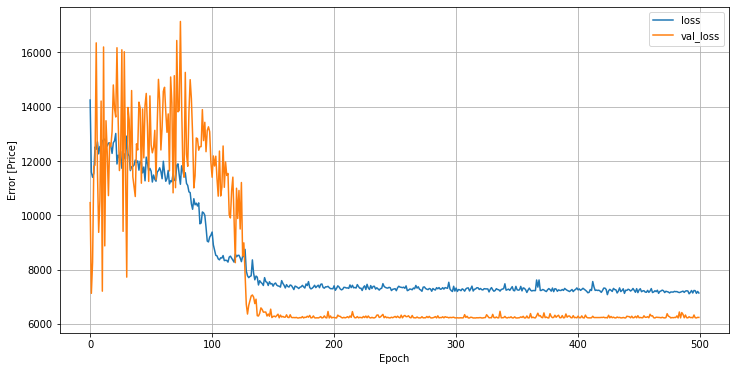

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()

plt.grid(True)

In [ ]:
linear_model.evaluate(X_test, y_test)

46/46 [==============================] - 0s 1ms/step - loss: 6628.3105 - mean_absolute_error: 6628.3105


[6628.310546875, 6628.310546875]

In [ ]:
preds = linear_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, preds)

In [ ]:
MAE

6628.311030136223